In [1]:
import pandas as pd 
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding as LLE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics.cluster import adjusted_rand_score as ARS
%matplotlib inline

In [2]:
x1 = pd.read_csv("H:\jupyter notebook\mnist_train.csv")

In [3]:
x1.shape

(60000, 785)

In [4]:
x1 = x1.iloc[:3000, :]

In [5]:
y = x1.label

In [6]:
x1.shape

(3000, 785)

In [7]:
t1 = x1.drop('label', axis = 1)

In [8]:
t1.head(2)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
x1.shape

(3000, 785)

In [10]:
x2 = pd.read_csv("H:\jupyter notebook\mnist_test.csv")

In [11]:
x2.shape

(10000, 785)

In [12]:
x2 = x2.iloc[:3000, :]

In [13]:
t2 = x2.drop('label', axis = 1)

In [14]:
y_test = x2.label

# Dimentional reduction

PCA

In [15]:
#PCA
pca = PCA(n_components=2)
a = pca.fit_transform(t1)

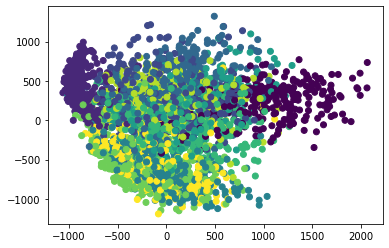

In [16]:
plt.scatter(a[:,0],a[:,1], c= x1.label);

LLE


In [17]:
#LLE train
dr = LLE(n_components=2)
a2 = dr.fit_transform(t1)

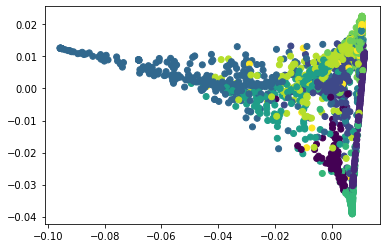

In [18]:
plt.scatter(a2[:,0],a2[:,1], c= x1.label);

In [19]:
#LLE train
dr_test = LLE(n_components=2)
a2_test = dr.fit_transform(t2)

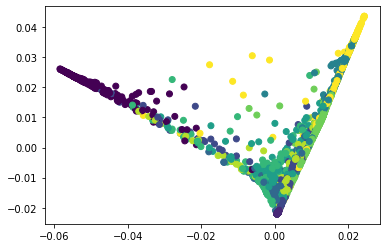

In [20]:
plt.scatter(a2_test[:,0],a2_test[:,1], c= x2.label);

LDA

In [21]:
#LDA
d = LDA(n_components=2)
a3 = d.fit_transform(t1,y)

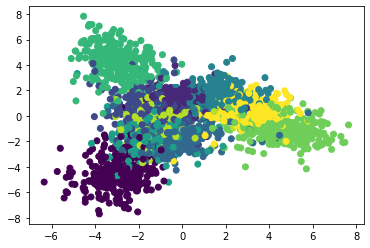

In [22]:
plt.scatter(a3[:,0],a3[:,1], c= x1.label);

# CVI

LLE selected

In [23]:
inertia = []
for i in range(1,10):
    c1 = KMeans(n_clusters=i)
    c1.fit_transform(a2)
    inertia.append(c1.inertia_)
    
    

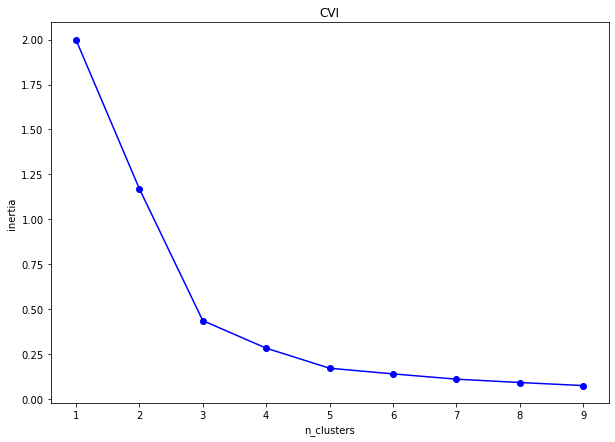

In [24]:
plt.figure(figsize=(10,7))
plt.plot(range(1,10),inertia,"bo-")
plt.title("CVI")
plt.xlabel("n_clusters")
plt.ylabel("inertia");

ellbow = 3

# Clustering

In [25]:
km = KMeans(n_clusters=3, random_state=1)
km.fit(a2)
y = km.predict(a2)
cntr = km.cluster_centers_

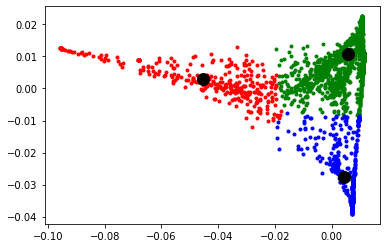

In [26]:
colors = 'rgbyc'
for k in range(km.n_clusters):
    plt.plot(a2[y==k,0],a2[y==k,1], colors[k] + '.' )
    plt.plot(cntr[k,0],cntr[k,1], 'ko' , markersize = 12);

In [27]:
km.labels_

array([1, 2, 1, ..., 1, 2, 1])

# Evaluation of k means clustering

ARS

In [29]:
ARS(y_test,km.labels_) 

-3.1879000723971106e-05

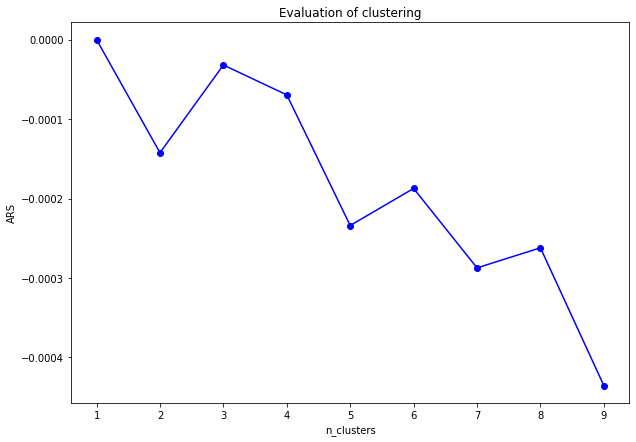

In [32]:
ars = []
for s in range(1,10):
    AR = KMeans(n_clusters=s)
    AR.fit_transform(a2)
    q= ARS(y_test, AR.labels_)
    ars.append(q)
    

plt.figure(figsize=(10,7))
plt.plot(range(1,10),ars,"bo-")
plt.title("Evaluation of clustering")
plt.xlabel("n_clusters")
plt.ylabel("ARS");